In [1]:
import ROOT

In [2]:
RGA_inputFiles = ["out/pippi0_fall2018_in_pass2/pippi0_fall2018_in_pass2.root","out/pippi0_spring2019_in_pass2/pippi0_spring2019_in_pass2.root"]
MC_inputFile = "out/MC_pippi0_fall2018_in_pass2/MC_pippi0_fall2018_in_pass2.root"

In [8]:
RGA_chain = ROOT.TChain("EventTree")
MC_chain = ROOT.TChain("EventTree")

for f in RGA_inputFiles:
    RGA_chain.Add(f)
MC_chain.Add(MC_inputFile)

print(MC_chain.GetEntries())
RGA_chain.GetEntries()

41793469


92214257

In [5]:
[b.GetName() for b in MC_chain.GetListOfBranches()]

['A',
 'evnum',
 'uID',
 'run',
 'Pol',
 'tPol',
 'hwp',
 'target',
 'tSign',
 'Nmax',
 'x',
 'y',
 'W',
 'Q2',
 'nu',
 'truex',
 'truey',
 'trueQ2',
 'trueW',
 'truenu',
 'hel',
 'truex',
 'truey',
 'trueW',
 'truenu',
 'pindex',
 'status',
 'px',
 'py',
 'pz',
 'p',
 'E',
 'pid',
 'vx',
 'vy',
 'vz',
 'chi2',
 'beta',
 'm',
 'theta',
 'eta',
 'phi',
 'truepx',
 'truepy',
 'truepz',
 'truep',
 'truept',
 'truem',
 'truetheta',
 'trueeta',
 'truephi',
 'truevx',
 'truevy',
 'truevz',
 'trueE',
 'is_CFR',
 'truepid',
 'trueparentid',
 'trueparentpid',
 'trueparentparentid',
 'trueparentparentpid',
 'pcal_sector',
 'pcal_e',
 'pcal_x',
 'pcal_y',
 'pcal_z',
 'pcal_lu',
 'pcal_lv',
 'pcal_lw',
 'pcal_m2u',
 'pcal_m2v',
 'pcal_m2w',
 'ecin_sector',
 'ecin_e',
 'ecin_x',
 'ecin_y',
 'ecin_z',
 'ecin_lu',
 'ecin_lv',
 'ecin_lw',
 'ecin_m2u',
 'ecin_m2v',
 'ecin_m2w',
 'ecout_sector',
 'ecout_e',
 'ecout_x',
 'ecout_y',
 'ecout_z',
 'ecout_lu',
 'ecout_lv',
 'ecout_lw',
 'ecout_m2u',
 'ecout_

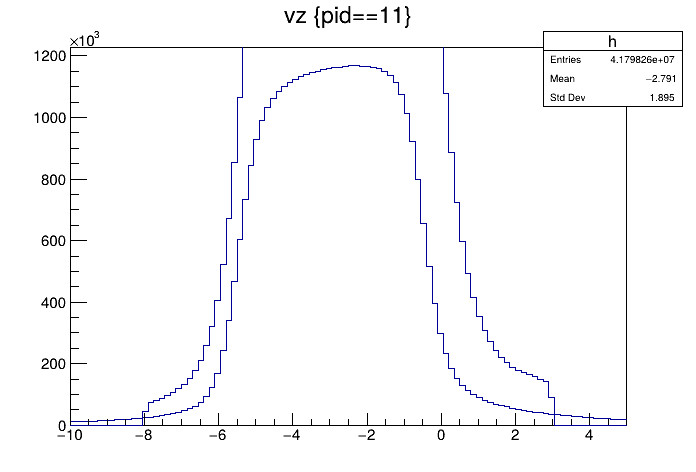

In [9]:
c = ROOT.TCanvas()
MC_chain.Draw("vz>>h(100,-10,5)","pid==11","")
RGA_chain.Draw("vz>>h1(100,-10,5)","pid==11","")
h = ROOT.gDirectory.Get("h")
h1 = ROOT.gDirectory.Get("h1")

h.Draw()
h1.Draw("SAME")
c.Draw()

In [4]:
zbin_edges = [0.66, 0.74, 0.79, 0.82, 0.85, 0.88, 0.91, 0.93, 0.96, 1]

In [41]:

RGA_hists = []
MC_hists = []
for bn_idx in range(len(zbin_edges)-1):
    MC_chain.Draw(f"Mh>>MCh_{bn_idx}(100,0.4,1.7)",f"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 && MCtrue_containsNeutron==1 &&MCpippi0parent_samerho==1&&{zbin_edges[bn_idx]}<z && z<{zbin_edges[bn_idx+1]}","goff")
    RGA_chain.Draw(f"Mh>>RGAh_{bn_idx}(100,0.4,1.7)",f"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 && {zbin_edges[bn_idx]}<z && z<{zbin_edges[bn_idx+1]}","goff")
    MChist = ROOT.gDirectory.Get(f"MCh_{bn_idx}")
    MChist.SetLineWidth(2)
    RGAhist = ROOT.gDirectory.Get(f"RGAh_{bn_idx}")
    RGAhist.SetLineWidth(2)
    RGAhist.SetLineColor(ROOT.kPink)

    normalize:
    RGAhist.Scale(1/RGAhist.GetEntries())
    MChist.Scale(1/MChist.GetEntries())
    
    RGA_hists.append(RGAhist)
    MC_hists.append(MChist)



Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


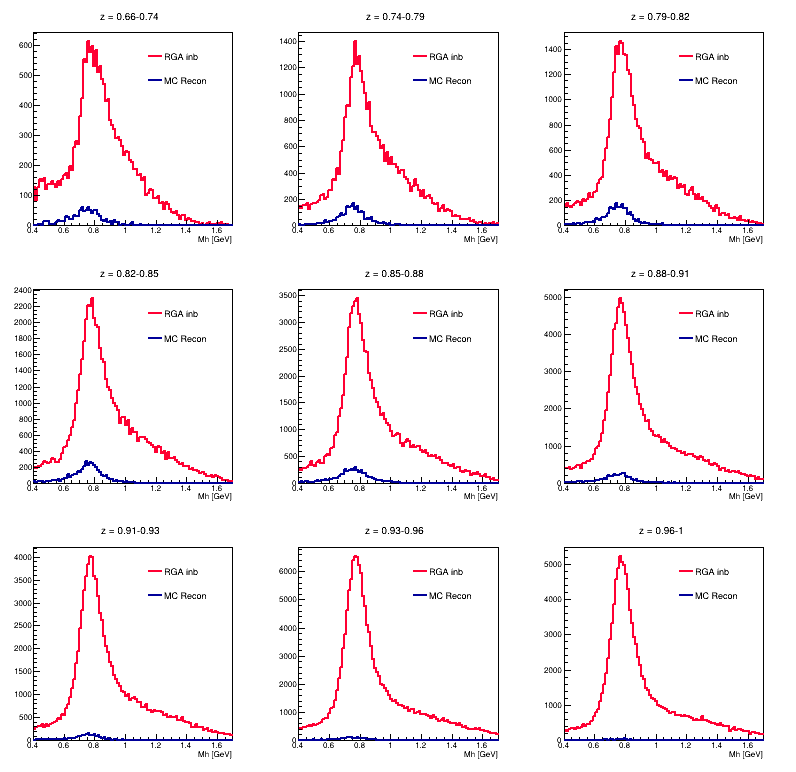

In [48]:
canvas = ROOT.TCanvas("canvas","c",800,800)
canvas.Divide(3,3)
leg = ROOT.TLegend(0.55,0.65,0.85,0.85)
for panel in range(9):
    canvas.cd(panel+1)
    RGA_hists[panel].SetStats(0)
    RGA_hists[panel].SetTitle(f"z = {zbin_edges[panel]}-{zbin_edges[panel+1]}")
    RGA_hists[panel].GetXaxis().SetTitle("Mh [GeV]")
    RGA_hists[panel].Draw()
    MC_hists[panel].SetStats(0)
    MC_hists[panel].SetTitle(f"z = {zbin_edges[panel]}-{zbin_edges[panel+1]}")
    MC_hists[panel].GetXaxis().SetTitle("Mh [GeV]")
    MC_hists[panel].Draw("SAME")
    
    leg.Clear()
    leg.AddEntry(RGA_hists[panel],"RGA inb","l")
    leg.AddEntry(MC_hists[panel],"MC Recon","l")
    leg.SetBorderSize(0)

    leg.Draw()
    

canvas.Draw()


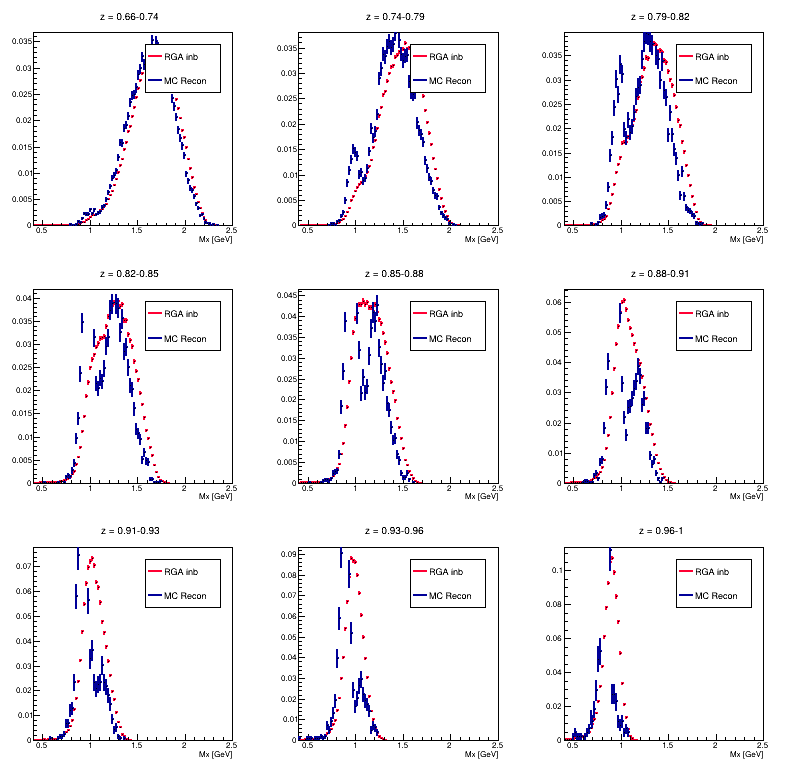

In [37]:
RGA_hists = []
MC_hists = []
for bn_idx in range(len(zbin_edges)-1):
    MC_chain.Draw(f"Mx>>MCh_{bn_idx}(100,0.4,2.5)",f"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.65<Mh&&Mh<0.9 && MCtrue_containsNeutron==1 &&MCpippi0parent_samerho==1&&{zbin_edges[bn_idx]}<z && z<{zbin_edges[bn_idx+1]}","goff")
    RGA_chain.Draw(f"Mx>>RGAh_{bn_idx}(100,0.4,2.5)",f"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.65<Mh&&Mh<0.9 && {zbin_edges[bn_idx]}<z && z<{zbin_edges[bn_idx+1]}","goff")
    MChist = ROOT.gDirectory.Get(f"MCh_{bn_idx}")
    MChist.SetLineWidth(2)
    RGAhist = ROOT.gDirectory.Get(f"RGAh_{bn_idx}")
    RGAhist.SetLineWidth(2)
    RGAhist.SetLineColor(ROOT.kPink)

    #normalize:
    RGAhist.Scale(1/RGAhist.GetEntries())
    MChist.Scale(1/MChist.GetEntries())
    
    RGA_hists.append(RGAhist)
    MC_hists.append(MChist)

canvas = ROOT.TCanvas("canvas","c",800,800)
canvas.Divide(3,3)
leg = ROOT.TLegend(0.55,0.65,0.85,0.85)
for panel in range(9):
    canvas.cd(panel+1)
    RGA_hists[panel].SetStats(0)
    RGA_hists[panel].SetTitle(f"z = {zbin_edges[panel]}-{zbin_edges[panel+1]}")
    RGA_hists[panel].GetXaxis().SetTitle("Mx [GeV]")
    RGA_hists[panel].Draw()
    MC_hists[panel].Draw("SAME")
    
    leg.Clear()
    leg.AddEntry(RGA_hists[panel],"RGA inb","l")
    leg.AddEntry(MC_hists[panel],"MC Recon","l")

    leg.Draw()
    

canvas.Draw()

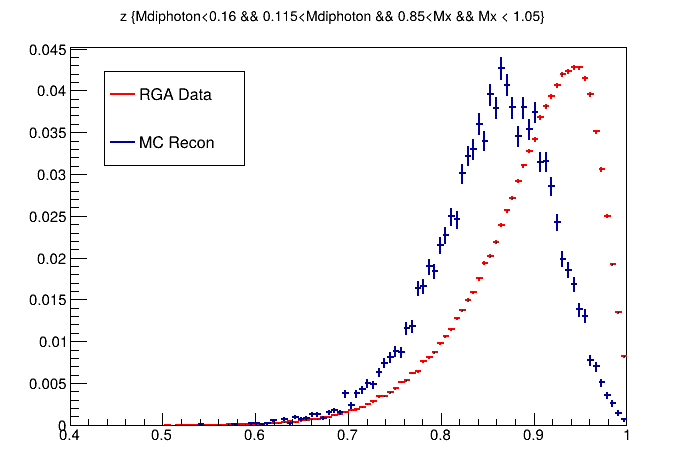

In [36]:
canvas = ROOT.TCanvas()

RGA_chain.Draw("z>>h(100,0.4,1)","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","goff")
MC_chain.Draw("z>>h1(100,0.4,1)","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05&&MCtrue_containsNeutron==1 &&MCpippi0parent_samerho==1","goff")

h = ROOT.gDirectory.Get("h")
h1 = ROOT.gDirectory.Get("h1")

#normalize:
h.Scale(1/h.GetEntries())
h1.Scale(1/h1.GetEntries())

h.SetLineColor(ROOT.kRed)
h.SetLineWidth(2)
h1.SetLineWidth(2)

leg = ROOT.TLegend(0.15,0.65,0.35,0.85)
leg.AddEntry(h,"RGA Data","l")
leg.AddEntry(h1,"MC Recon","l")

h.SetStats(0)
h.Draw()
h1.Draw("SAME")
leg.Draw()
canvas.Draw()

In [28]:
[b.GetName() for b in MC_chain.GetListOfBranches()]

['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true',
 'th',
 'th_true',
 'cth',
 'cth_true',
 'MCtrue_containsNeutron',
 'truepho1_pid',
 'truepho2_pid',
 'truepip_pid',
 'trueelectron_pid',
 'MCpippi0parent_samerho',
 'MCphoparent_samepi0',
 'truepipparent_pid',
 'truepipparent_id',
 'truepho2parentparent_pid',
 'truepho2parentparent_id',
 'truepho2parent_pid',
 'truepho2parent_id',
 'truepho1parentparent_pid',
 'truepho1parentparent_id',
 'truepho1parent_pid',
 'truepho1parent_id']

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


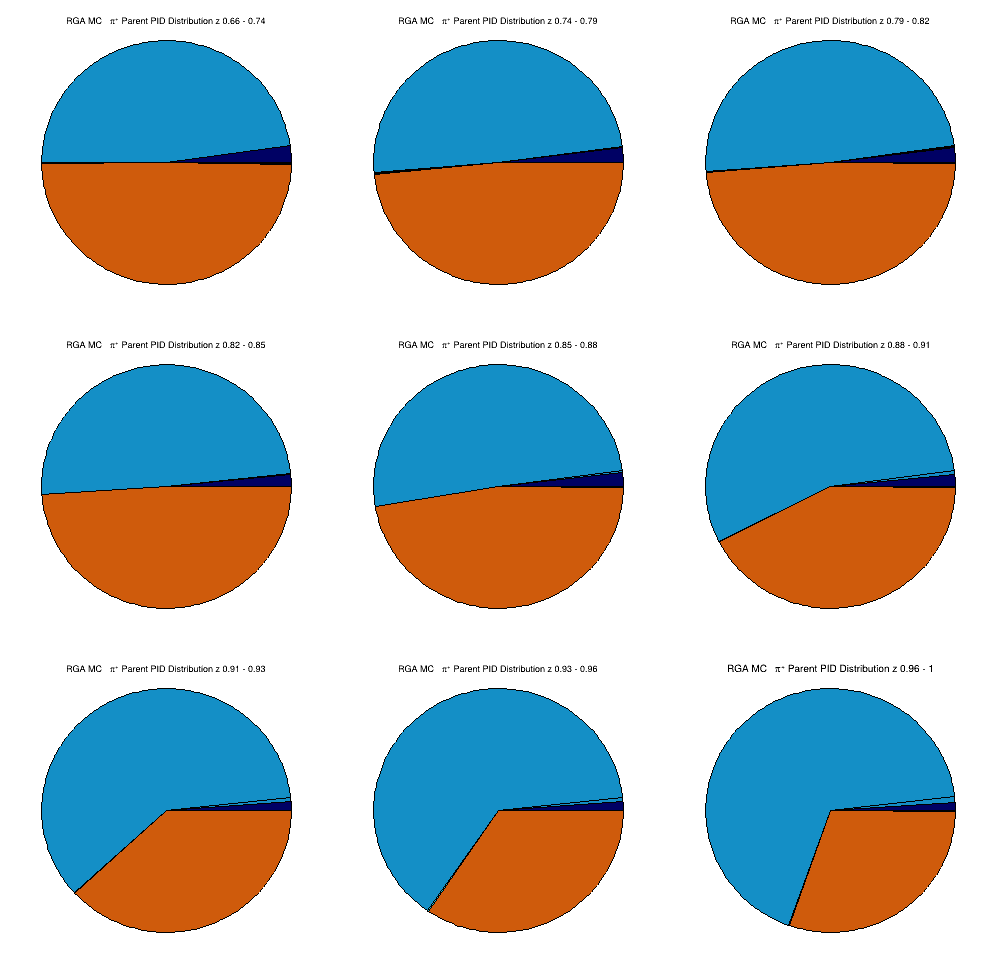

In [32]:
c = ROOT.TCanvas("c","c",1000,1000)
c.Divide(3,3)
#pad1 = c.cd(1)
#pad1.SetPad(0.0,0.0,0.7,1.0)
#pad1 = c.cd(2)
#pad1.SetPad(0.7,0.0,1.0,1.0)
pies = []
for i in range(len(zbin_edges)-1):
    c.cd(i+1)
    ROOT.gStyle.SetPalette(ROOT.kRainbow)
    MC_chain.Draw("truepipparent_pid>>h(1350,-1000,350)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&MCtrue_containsNeutron==1 && 0.85<Mx && Mx < 1.05&& {zbin_edges[i]}<z&&z<{zbin_edges[i+1]}","goff")
    h = ROOT.gDirectory.Get("h")
    pie = ROOT.TPie(f"pie_{i}",f"RGA MC #pi^{{+}} Parent PID Distribution z {zbin_edges[i]} - {zbin_edges[i+1]}", h.GetNbinsX())
    
    dummyhists = []
    leg = ROOT.TLegend(0.1,0.1,0.85,0.85)
    for i in range (1, h.GetNbinsX()+1):
        count = h.GetBinContent(i)
        if count<1:
            continue
    
        pid_val = int(h.GetBinCenter(i))
        pie.SetEntryVal(i-1,count)
        pie.SetEntryLabel(i-1,str(pid_val))
        temp = ROOT.TH1F(f"h_{i}","dummy hist",100,0,1)
        temp.SetFillColor(pie.GetEntryFillColor(i-1))
        dummyhists.append(temp)
        leg.AddEntry(temp,f"{pid_val} - {round(count/h.GetEntries()*100,2)}%","f")
    
    pie.SetRadius(0.4)
    pie.SetLabelFormat("")
    pie.Draw()
    pies.append(pie)

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


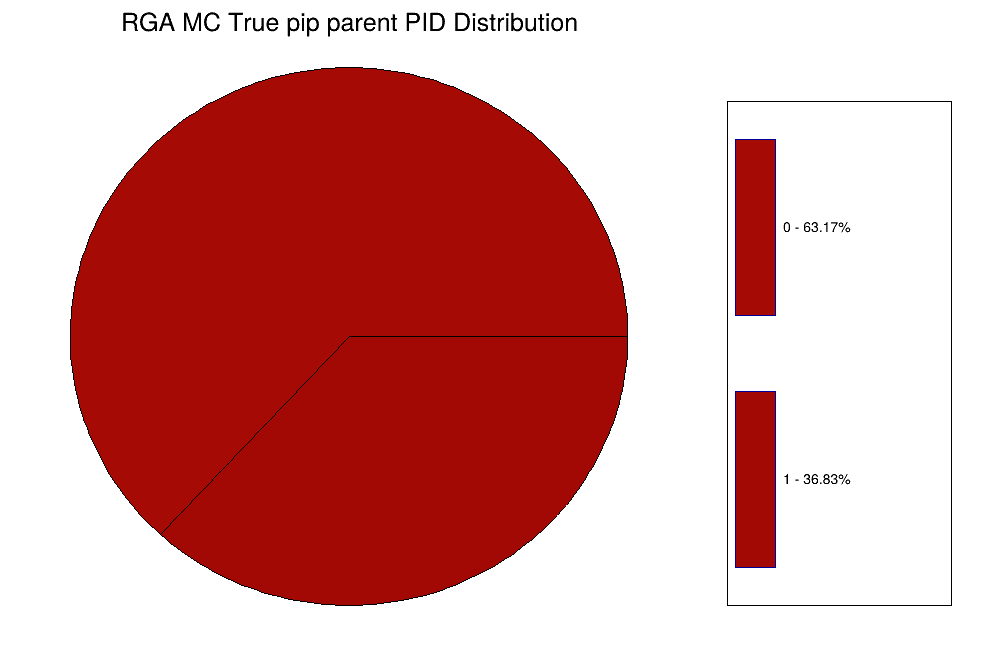

In [35]:
c = ROOT.TCanvas("c","c",1000,700)
c.Divide(2,1)
pad1 = c.cd(1)
pad1.SetPad(0.0,0.0,0.7,1.0)
pad1 = c.cd(2)
pad1.SetPad(0.7,0.0,1.0,1.0)

ROOT.gStyle.SetPalette(ROOT.kRainbow)
MC_chain.Draw(">>h(1350,-1000,350)","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05&& MCtrue_containsNeutron==1 &&MCpippi0parent_samerho==1","goff")
h = ROOT.gDirectory.Get("h")
pie = ROOT.TPie("pie","RGA MC True pip parent PID Distribution", h.GetNbinsX())

dummyhists = []
leg = ROOT.TLegend(0.1,0.1,0.85,0.85)
for i in range (1, h.GetNbinsX()+1):
    count = h.GetBinContent(i)
    if count<1:
        continue

    pid_val = int(h.GetBinCenter(i))
    pie.SetEntryVal(i-1,count)
    pie.SetEntryLabel(i-1,str(pid_val))
    temp = ROOT.TH1F(f"h_{i}","dummy hist",100,0,1)
    temp.SetFillColor(pie.GetEntryFillColor(i-1))
    dummyhists.append(temp)
    leg.AddEntry(temp,f"{pid_val} - {round(count/h.GetEntries()*100,2)}%","f")

pie.SetRadius(0.4)
pie.SetLabelFormat("")
leg.SetTextSize(0.05)
c.cd(1)
pie.Draw()
c.cd(2)
leg.Draw()
c.Draw()

In [50]:
MC_chain.GetEntries()/RGA_chain.GetEntries()

0.37567999429430077

In [53]:
[b.GetName() for b in MC_chain.GetListOfBranches()]

['A',
 'evnum',
 'uID',
 'run',
 'Pol',
 'tPol',
 'hwp',
 'target',
 'tSign',
 'Nmax',
 'x',
 'y',
 'W',
 'Q2',
 'nu',
 'truex',
 'truey',
 'trueQ2',
 'trueW',
 'truenu',
 'hel',
 'truex',
 'truey',
 'trueW',
 'truenu',
 'pindex',
 'status',
 'px',
 'py',
 'pz',
 'p',
 'E',
 'pid',
 'vx',
 'vy',
 'vz',
 'chi2',
 'beta',
 'm',
 'theta',
 'eta',
 'phi',
 'truepx',
 'truepy',
 'truepz',
 'truep',
 'truept',
 'truem',
 'truetheta',
 'trueeta',
 'truephi',
 'truevx',
 'truevy',
 'truevz',
 'trueE',
 'is_CFR',
 'truepid',
 'trueparentid',
 'trueparentpid',
 'trueparentparentid',
 'trueparentparentpid',
 'pcal_sector',
 'pcal_e',
 'pcal_x',
 'pcal_y',
 'pcal_z',
 'pcal_lu',
 'pcal_lv',
 'pcal_lw',
 'pcal_m2u',
 'pcal_m2v',
 'pcal_m2w',
 'ecin_sector',
 'ecin_e',
 'ecin_x',
 'ecin_y',
 'ecin_z',
 'ecin_lu',
 'ecin_lv',
 'ecin_lw',
 'ecin_m2u',
 'ecin_m2v',
 'ecin_m2w',
 'ecout_sector',
 'ecout_e',
 'ecout_x',
 'ecout_y',
 'ecout_z',
 'ecout_lu',
 'ecout_lv',
 'ecout_lw',
 'ecout_m2u',
 'ecout_

In [59]:

print(MC_chain.GetEntries())
MC_chain.Show(0)

41793469
======> EVENT:0
 A               = 0
 evnum           = 9
 uID             = 0
 run             = -11
 Pol             = 0.86
 tPol            = 0
 hwp             = 0
 target          = -999
 tSign           = 0
 Nmax            = 9
 x               = 0.156572
 y               = 0.644848
 W               = 3.42098
 Q2              = 2.00911
 nu              = 6.83803
 truex           = 0.156469
 truey           = 0.643964
 trueQ2          = 2.00503
 trueW           = 3.41901
 truenu          = 6.82866
 hel             = 0
 truex           = 0.156469
 truey           = 0.643964
 trueW           = 3.41901
 truenu          = 6.82866
 pindex          = 0, 
                  1, 2, 3, 4, 5, 6, 8, 10
 status          = -2131, 
                  2230, 2000, 4000, 2010, 2230, 2010, 2010, 2010
 px              = 0.834845, 
                  -0.423376, 0.257955, 0.226126, -0.657113, -0.545187, 
                  -0.18691, -0.0933052, -0
 py              = -0.0871704, 
                  